<a href="https://colab.research.google.com/github/son50git/PKT_003_Mastering-Matplotlib-3/blob/master/PKT_003_Reowrk_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
from google.colab import drive, files
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
uploaded = files.upload()

Saving vgsales.csv to vgsales.csv


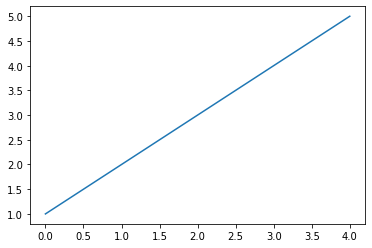

In [ ]:
plt.plot([1,2,3,4,5])
plt.show()

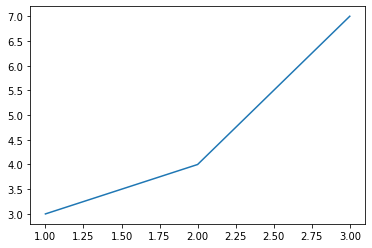

In [ ]:
plt.plot([1,2,3],[3,4,7])
plt.show()

In [ ]:
sales = pd.read_csv("vgsales.csv")
print(sales.shape)
sales.head()

(16598, 11)


,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


No handles with labels found to put in legend.


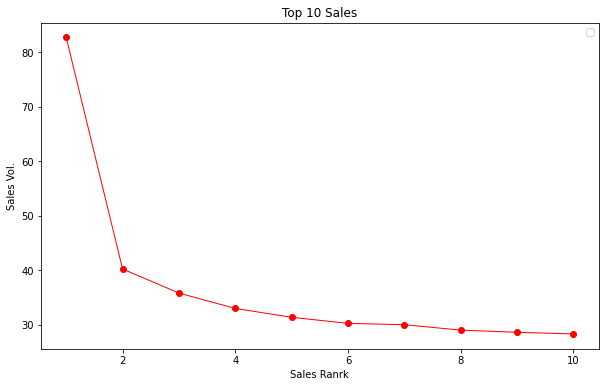

In [ ]:
rank = sales.Rank[0:10]
gsales = sales.Global_Sales[0:10]
plt.figure(figsize=(10,6))
plt.plot(rank, gsales, "ro", linewidth=1, linestyle="solid")
plt.xlabel("Sales Ranrk")
plt.ylabel("Sales Vol.")
plt.title("Top 10 Sales")
plt.legend()
plt.show()

In [ ]:
tmp = sales.groupby(["Year"])["Global_Sales"].sum()
type(tmp) # Series
tmp.head() # can use with Series

Year
1980.0    11.38
1981.0    35.77
1982.0    28.86
1983.0    16.79
1984.0    50.36
Name: Global_Sales, dtype: float64

<class 'pandas.core.series.Series'>


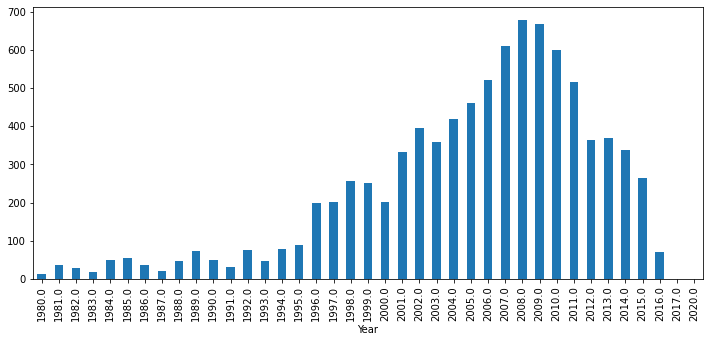

In [ ]:
yearly_sales = pd.DataFrame({'total_global_sales':tmp}).reset_index().set_index(["Year"])
yearly_sales.head()
yearly_sales.columns # not including index

tmp = yearly_sales.total_global_sales
print(type(tmp)) # Series

plt.figure(figsize=(12,5))
chart = yearly_sales.total_global_sales.plot(kind='bar') # Series.plot()

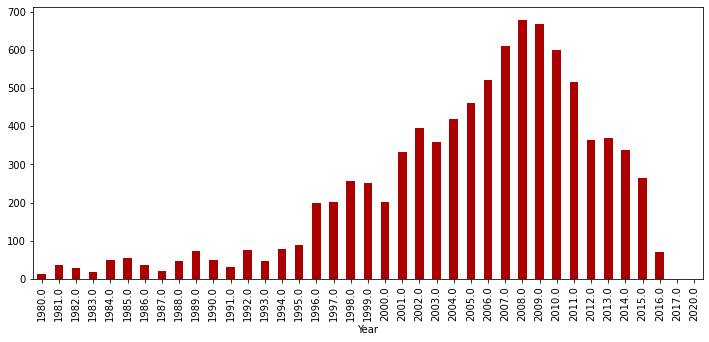

In [ ]:
plt.figure(figsize=(12,5));
chart = yearly_sales.total_global_sales.plot(kind='bar',facecolor='#AA0000');

In [ ]:
platform_sales = pd.DataFrame({'total_global_sales' : sales.groupby( [ "Platform"] )['Global_Sales'].
  sum()}).reset_index().set_index(['Platform'])
platform_sales.head()

,total_global_sales
Platform,
2600,97.08
3DO,0.10
3DS,247.46
DC,15.97
DS,822.49


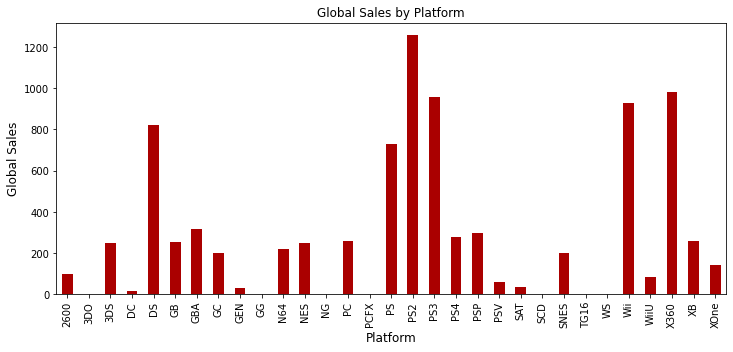

In [ ]:
plt.figure(figsize=(12,5));
chart = platform_sales.total_global_sales.plot(kind='bar',facecolor='#AA0000', title='Global Sales by Platform');
chart.set_xlabel("Platform", fontsize=12);
chart.set_ylabel("Global Sales", fontsize=12);

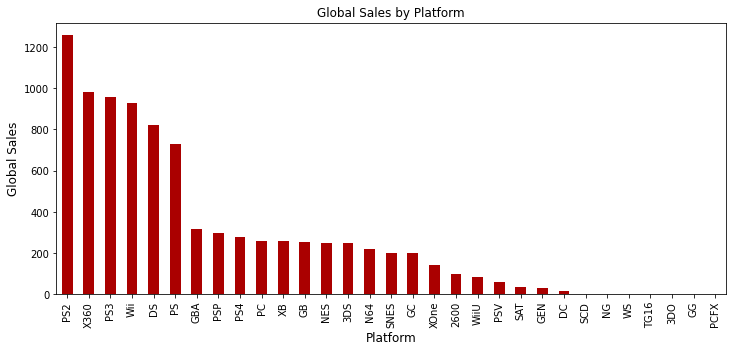

In [ ]:
platform_sales_sorted = platform_sales.sort_values(['total_global_sales'], ascending=False)
plt.figure(figsize=(12,5));
chart = platform_sales_sorted.total_global_sales.plot(kind='bar',facecolor='#AA0000', title='Global Sales by Platform');
chart.set_xlabel("Platform", fontsize=12);
chart.set_ylabel("Global Sales", fontsize=12);

In [ ]:
genre = sales[[ "Genre", 'NA_Sales','EU_Sales','JP_Sales']].groupby(['Genre'], as_index=False).sum()
genre

,Genre,NA_Sales,EU_Sales,JP_Sales
0,Action,877.83,525.00,159.95
1,Adventure,105.80,64.13,52.07
2,Fighting,223.59,101.32,87.35
3,Misc,410.24,215.98,107.76
4,Platform,447.05,201.63,130.77
5,Puzzle,123.78,50.78,57.31
6,Racing,359.42,238.39,56.69
7,Role-Playing,327.28,188.06,352.31
8,Shooter,582.60,313.27,38.28
9,Simulation,183.31,113.38,63.70


In [ ]:
genre = sales.groupby(['Genre'], as_index=False)[[ "Genre", 'NA_Sales','EU_Sales','JP_Sales']].sum()
genre

,Genre,NA_Sales,EU_Sales,JP_Sales
0,Action,877.83,525.00,159.95
1,Adventure,105.80,64.13,52.07
2,Fighting,223.59,101.32,87.35
3,Misc,410.24,215.98,107.76
4,Platform,447.05,201.63,130.77
5,Puzzle,123.78,50.78,57.31
6,Racing,359.42,238.39,56.69
7,Role-Playing,327.28,188.06,352.31
8,Shooter,582.60,313.27,38.28
9,Simulation,183.31,113.38,63.70


In [ ]:
tmp = genre['NA_Sales']  
print(tmp)
print(type(tmp)) # Sereis
print(len(tmp)) # 12 -- can use len() & head() & even shape (x,)  with Series
bar_l = [i+1 for i in range(len(genre['NA_Sales']))]
bar_l  # [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]

0     877.83
1     105.80
2     223.59
3     410.24
4     447.05
5     123.78
6     359.42
7     327.28
8     582.60
9     183.31
10    683.35
11     68.70
Name: NA_Sales, dtype: float64
<class 'pandas.core.series.Series'>
12


[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]

In [ ]:
# pyplot.subplots creates a figure and a grid of subplots with a single call, 
# while providing reasonable control over how the individual plots are created. 

# Figure: The top level container for all the plot elements.
# Axes:  contains most of the figure elements: Axis, Tick, Line2D, Text, 
# Polygon, etc., and sets the coordinate system.

In [ ]:
tmp = [i + j for i,j in zip(genre["NA_Sales"],genre["EU_Sales"])]
tmp

[1402.8299999999772,
 169.93000000000006,
 324.9100000000004,
 626.2199999999993,
 648.6799999999993,
 174.56000000000006,
 597.809999999998,
 515.3399999999993,
 895.8699999999917,
 296.69000000000085,
 1060.1999999999912,
 114.04000000000025]

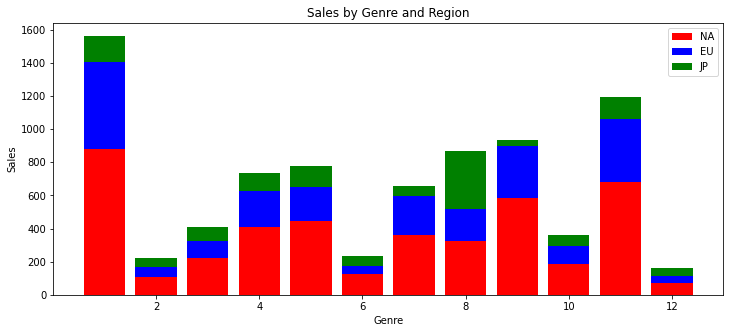

In [ ]:
f, ax = plt.subplots(1, figsize=(12,5))
bar_l = [i+1 for i in range(len(genre['NA_Sales']))]
ax.bar(bar_l, genre["NA_Sales"], label="NA", color="red")
ax.bar(bar_l, genre["EU_Sales"], label="EU", color="blue", bottom=genre["NA_Sales"])
ax.bar(bar_l, genre["JP_Sales"], label="JP", color="green", bottom=tmp)
ax.set_title("Sales by Genre and Region")
ax.set_xlabel("Genre")
ax.set_ylabel("Sales")
plt.legend(loc='upper right')

In [ ]:
sales.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [ ]:
sales['Genre'].unique()

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy'], dtype=object)

In [ ]:
tmp = pd.factorize(sales['Genre'])  # str to numeric mapping
print(type(tmp)) # tuple
tmp

<class 'tuple'>


(array([0, 1, 2, ..., 2, 4, 1]),
 Index(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
        'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure', 'Strategy'],
       dtype='object'))

In [ ]:
sales['genre_enc'] = pd.factorize(sales['Genre'])[0]
print(sales['genre_enc'].unique())
print(sales.genre_enc.unique())

[ 0  1  2  3  4  5  6  7  8  9 10 11]
[ 0  1  2  3  4  5  6  7  8  9 10 11]


(array([3232., 1249., 1488.,  582., 1739., 1310.,  867., 3316.,  848.,
        1967.]),
 array([ 0. ,  1.1,  2.2,  3.3,  4.4,  5.5,  6.6,  7.7,  8.8,  9.9, 11. ]),
 <a list of 10 Patch objects>)

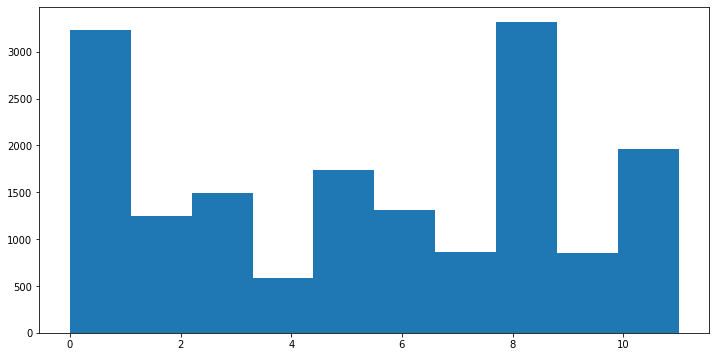

In [ ]:
plt.figure(figsize=(12,6))
# plt.hist(sales.genre_enc)
plt.hist(sales["genre_enc"])

In [ ]:
# plt.hist(sales.genre)   # ERROR: keyerror  # presumably because of absence of ordinality
# plt.hist(sales["genre"]) # ERROR: keyerror

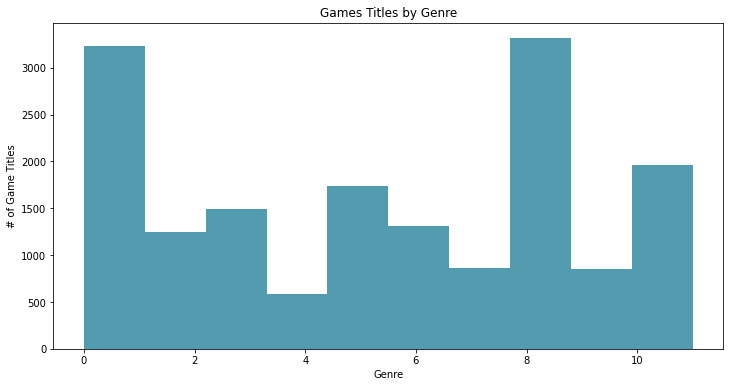

In [ ]:
plt.figure(figsize=(12,6));
plt.hist(sales.genre_enc, color = '#539caf');
plt.title("Games Titles by Genre");
plt.xlabel("Genre");
plt.ylabel("# of Game Titles");
plt.show();

count    16598.000000
mean         0.264667
std          0.816683
min          0.000000
25%          0.000000
50%          0.080000
75%          0.240000
max         41.490000
Name: NA_Sales, dtype: float64


(array([1.6518e+04, 5.5000e+01, 1.5000e+01, 6.0000e+00, 0.0000e+00,
        1.0000e+00, 1.0000e+00, 1.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([ 0.   ,  4.149,  8.298, 12.447, 16.596, 20.745, 24.894, 29.043,
        33.192, 37.341, 41.49 ]),
 <a list of 10 Patch objects>)

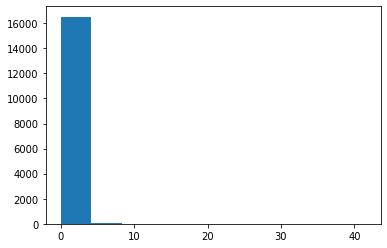

In [ ]:
print(sales["NA_Sales"].describe())
plt.hist(sales["NA_Sales"])

(array([43., 38., 10.,  5.,  0.,  1.,  2.,  0.,  0.,  1.]),
 array([ 0.98 ,  5.031,  9.082, 13.133, 17.184, 21.235, 25.286, 29.337,
        33.388, 37.439, 41.49 ]),
 <a list of 10 Patch objects>)

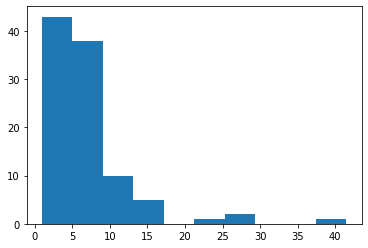

In [143]:
plt.hist(sales[:100]['NA_Sales'])

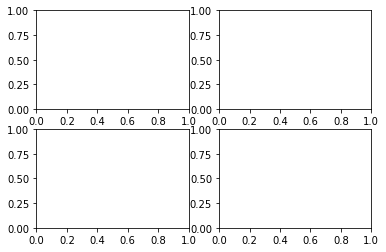

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=2)
ax0, ax1, ax2, ax3 = axes.flat
plt.show()

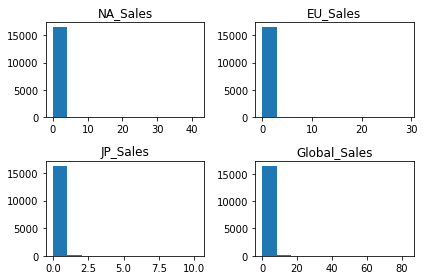

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=2)
ax0, ax1, ax2, ax3 = axes.flat
ax0.hist(sales["NA_Sales"])
ax0.set_title('NA_Sales')
ax1.hist(sales["EU_Sales"])
ax1.set_title('EU_Sales')
ax2.hist(sales["JP_Sales"])
ax2.set_title('JP_Sales')
ax3.hist(sales["Global_Sales"])
ax3.set_title('Global_Sales')
plt.tight_layout()
plt.show();

In [132]:
sales[:100]['NA_Sales'].head()

0    41.49
1    29.08
2    15.85
3    15.75
4    11.27
Name: NA_Sales, dtype: float64

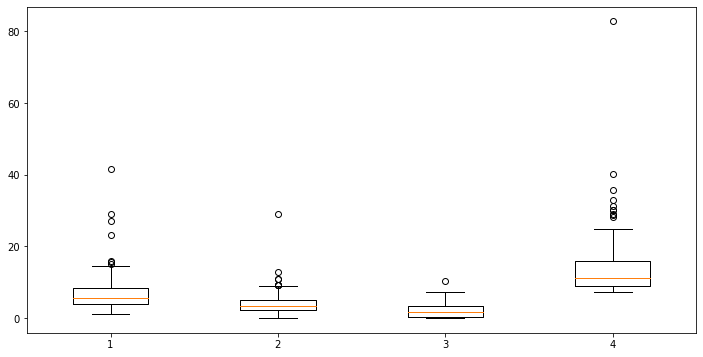

In [138]:
sales_by_region = [sales[:100]['NA_Sales'], sales[:100]['EU_Sales'], sales[:100]['JP_Sales'], sales[:100]['Global_Sales']]
plt.figure(1, figsize=(12, 6))
plt.boxplot(sales_by_region)
plt.show;

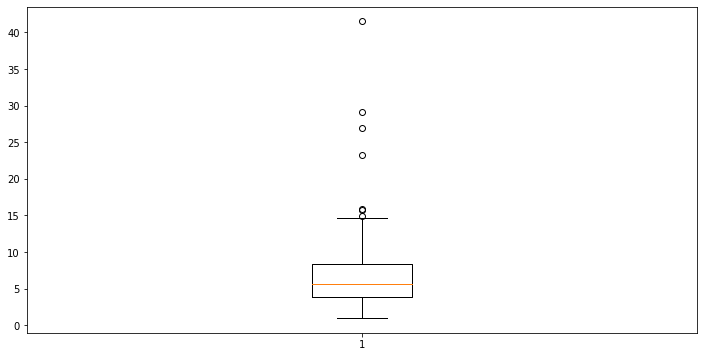

In [140]:
plt.figure(1, figsize=(12, 6))
plt.boxplot(sales[:100]['NA_Sales'])
plt.show;

{'boxes': [<matplotlib.lines.Line2D at 0x7f5f16f54c18>,
 'caps': [<matplotlib.lines.Line2D at 0x7f5f16f62668>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f5f16f6d128>,
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f5f16f62d68>,
 'whiskers': [<matplotlib.lines.Line2D at 0x7f5f16f54f28>,
  <matplotlib.lines.Line2D at 0x7f5f16f14ac8>]}

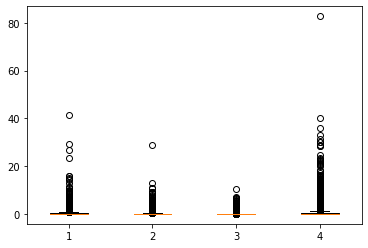

In [139]:
sales_by_region_all = [sales["NA_Sales"], sales['EU_Sales'], sales['JP_Sales'], sales['Global_Sales']]
plt.boxplot(sales_by_region_all)

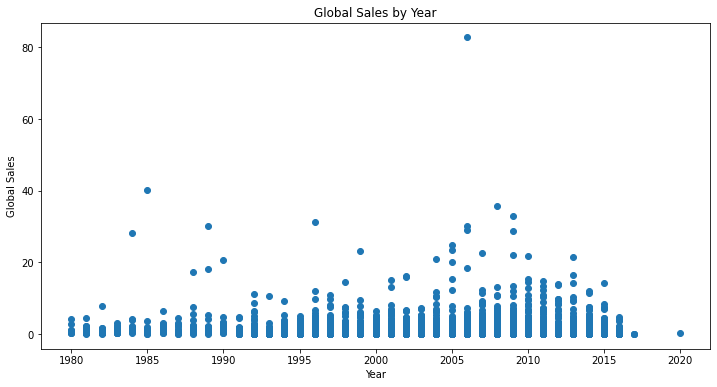

In [144]:
plt.figure(figsize=(12,6))
plt.scatter(sales.Year, sales.Global_Sales)
plt.title('Global Sales by Year')
plt.xlabel('Year')
plt.ylabel('Global Sales')
plt.show();

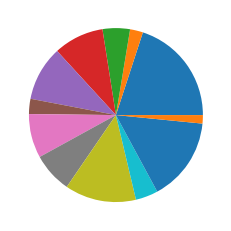

In [145]:
plt.pie(genre['NA_Sales'])
plt.show();

In [146]:
plt.savefig("foo.png")

<Figure size 432x288 with 0 Axes>

In [147]:
!ls

drive  foo.png	sample_data  vgsales.csv


In [149]:
!ls "drive/My Drive"

'Colab Notebooks'
